### Why squared error loss is not appropriate for logistic regression when dealing with categorical data?
    We can't use the cost function of Linear Regression for the categorical data.
    
     Regression Cost function:  J(w,b) = 1/2m Σ (f(x) - y)**2
     
                             where f(x) = w. x + b
     
     When we draw the graph for Cost J(w, b) vs w, the graph will be convex (bowl shaped)  as the f(x) is linear, and it will always reach global minima
     
     But the logistic regression, now has a non-linear component, the sigmoid function g(z)
     
                 Recall that f(x) = sigmoid(w.x + b) = g(w.x + b) = 1/ (1+e^-(w.x+b)
     
     Suppose, we use the  cost function  i.e squared error cost but now including the sigmoid for logistic regression. i.e f(x) will be the sigmoid(regression) = g(w.x + b)
                                 
      When we plot the cost function, the plot will be soo wiggly with lots of local minima's(not convex). Hence the gradient descent may stuck at local minima instead of finding the global minima
      
      Logistic regression requires a cost function more suitable to its non-linear nature. 
      
      Logistic Regression uses a loss function called "logistic loss"  more suited to the task of categorization where the target is 0 or 1 rather than any number.
      
      Logistic Loss is also called "Binary cross entropy"
      
### Logistic Loss
            
            Loss(f(x), y) = { -log(f(x)) for y=1
                            { -(1-log(f(x)) for y=0
                      
          f(x) is the model's prediction, while y is the target value.
          f(x) = g(w. x + b) where function g is the sigmoid function
       
       The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target is zero or (y=0) and another for when the target is one (y=1). Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target.
       
       Combined, the curves are similar to the quadratic curve of the squared error loss. Note, the x-axis is f(x) which is the output of a sigmoid and the y-axis is loss. The sigmoid output is strictly between 0 and 1.
       
       The loss function above can be rewritten to be easier to implement.
           
                   Loss(f(x), y) =  -y log(f(x)) - (1-y) (1-log(f(x))
                      

       This is a rather formidable-looking equation. It is less daunting when you consider y can have only two values, 0 and 1. One can then consider the equation in two pieces: when y=0, the left-hand term is eliminated: 
       
                   Loss(f(x), y) =  -0 log(f(x)) - (1-0) (1-log(f(x)) = - (1-logf(x))
                   
       and when y=1, the right-hand term is eliminated:
                   Loss(f(x), y) =  -1 log(f(x)) - (1-1) (1-log(f(x)) = - (logf(x))

    OK, with this new logistic loss function, a cost function can be produced that incorporates the loss from all the examples. 
    

In [78]:
import numpy as np
np.set_printoptions(precision=2)
import matplotlib.pyplot as plt
%matplotlib widget
import math
import pandas as pd

In [69]:
#np.meshgrid()
x = np.array([1, 2, 3])
y = np.array([10, 20, 30])

# Create a mesh grid using np.meshgrid()
X, Y = np.meshgrid(x, y)
print(X)
print(Y)

#In this example, x has three elements [1, 2, 3], and y has three elements [10, 20, 30].
#The np.meshgrid() function will generate a grid of points by creating two 2D arrays (X and Y) based on the input arrays x and y.
#Here's how np.meshgrid() works:
#The x and y arrays define the coordinates along the x-axis and y-axis, respectively.
#The np.meshgrid(x, y) call creates two 2D arrays (X and Y) such that each element of X represents the x-coordinate of a point on the grid, and each element of Y represents the y-coordinate of a point on the grid.
#The X array will have the same number of columns as the length of x, and each column will be a copy of the x array. In this example, X will have three columns [1, 2, 3] repeated three times.
#The Y array will have the same number of rows as the length of y, and each row will be a copy of the y array. In this example, Y will have three rows [10, 20, 30] repeated three times.

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[10 10 10]
 [20 20 20]
 [30 30 30]]


[-20.   -15.56 -11.11  -6.67  -2.22   2.22   6.67  11.11  15.56  20.  ]
[[-20.   -15.56 -11.11  -6.67  -2.22   2.22   6.67  11.11  15.56  20.  ]
 [-20.   -15.56 -11.11  -6.67  -2.22   2.22   6.67  11.11  15.56  20.  ]
 [-20.   -15.56 -11.11  -6.67  -2.22   2.22   6.67  11.11  15.56  20.  ]
 [-20.   -15.56 -11.11  -6.67  -2.22   2.22   6.67  11.11  15.56  20.  ]
 [-20.   -15.56 -11.11  -6.67  -2.22   2.22   6.67  11.11  15.56  20.  ]
 [-20.   -15.56 -11.11  -6.67  -2.22   2.22   6.67  11.11  15.56  20.  ]
 [-20.   -15.56 -11.11  -6.67  -2.22   2.22   6.67  11.11  15.56  20.  ]
 [-20.   -15.56 -11.11  -6.67  -2.22   2.22   6.67  11.11  15.56  20.  ]
 [-20.   -15.56 -11.11  -6.67  -2.22   2.22   6.67  11.11  15.56  20.  ]
 [-20.   -15.56 -11.11  -6.67  -2.22   2.22   6.67  11.11  15.56  20.  ]]
-----------------------------------
[-20.   -15.56 -11.11  -6.67  -2.22   2.22   6.67  11.11  15.56  20.  ]
[[-20.   -20.   -20.   -20.   -20.   -20.   -20.   -20.   -20.   -20.  ]
 [-15.56 -15.56 

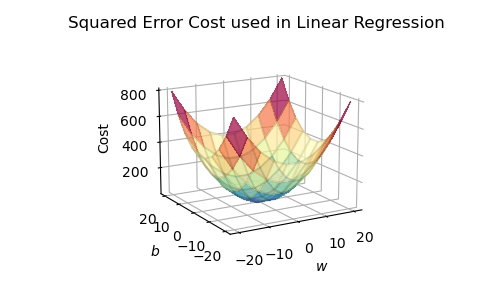

In [85]:
#3d Plot to show the squared error cost vs w for linear regression
def soup_bowl():
    """ creates 3D quadratic error surface """
    fig = plt.figure(figsize=(5, 3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

    ax = fig.add_subplot(111, projection='3d')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) #rgba
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_rotate_label(False)
    ax.view_init(15, -120)

    w = np.linspace(-20, 20, 10)
    b = np.linspace(-20, 20, 10)
    z = np.zeros((len(w), len(b))) #sample cost function - not the original one z = w^2 + b^2 
#     print(w.shape) #(10,)
#     print(b.shape) #(10,)
#     print(z.shape) #(10, 10)
    j=0
    for x in w:
        i=0
        for y in b:
            z[i, j] = x**2 + y**2
            i+=1
        j+=1
    
    #Meshgrid used for plotting 3D functions
    W, B = np.meshgrid(w, b) #Return coordinate matrices from coordinate vectors.
#     print(W.shape) #(10, 10)
#     print(B.shape) #(10,10)
#     print(z.shape) #(10, 10)
    print(w)
    print(W)
    print("-----------------------------------")
    print(b)
    print(B)
    print("-----------------------------------")
    print(z)

    ax.plot_surface(W, B, z, cmap="Spectral_r", alpha=0.7, antialiased=False)
    ax.plot_wireframe(W, B, z, color="k", alpha=0.1) #color of lines on the convex shape
    ax.set_xlabel("$w$")
    ax.set_ylabel("$b$")
    ax.set_zlabel("Cost", rotation=90)
    ax.set_title("Squared Error Cost used in Linear Regression")

    plt.show()

soup_bowl()

    Notes:
    ------
    The argument 111 is used to specify the layout of the subplots within the figure.

    The add_subplot() function is used to add a subplot to the figure, and the arguments passed to it determine the layout of the subplots.

    The argument 111 can be broken down into three digits: 1, 1, and 1.
    The first digit (1) represents the number of rows in the subplot grid. In this case, it indicates that there is only one row.
    The second digit (1) represents the number of columns in the subplot grid. Similarly, it indicates that there is only one column.
    The third digit (1) represents the position of the subplot within the grid. Since there is only one subplot in this case, it is positioned in the first (and only) cell of the grid.

    So, in summary, 111 specifies a subplot grid with one row, one column, and the current subplot positioned in the first (and only) cell of the grid. This creates a single subplot that spans the entire figure for the 3D plot.

    Note: In the soup_bowl() function, the choice of z = x**2 + y**2 is a simple quadratic function used to create a visually appealing 3D plot. This function represents a quadratic error surface that resembles a "bowl" shape.
    
    The cost function in linear regression is indeed the mean squared error (MSE) given by 
    
                    cost = (1/2m) * sum((y_pred - y_actual)**2)
                    
    The z = x**2 + y**2 expression used in the soup_bowl() function does not directly represent the cost function of linear regression. It is a simplified quadratic function used in the code to create a visual representation of a quadratic error surface. The purpose of the soup_bowl() function is to demonstrate how to create a 3D plot of a quadratic surface using Matplotlib, rather than representing the actual cost function used in linear regression

    It is often used as a simple example to demonstrate the concept of a convex cost surface. In linear regression, the goal is to find the values of w and b that minimize the cost function, typically the mean squared error (MSE).

    By using z = x**2 + y**2 in the soup_bowl() function, we create a cost surface that is visually easy to interpret. It forms a symmetric bowl shape centered at (x, y) = (0, 0). This bowl-shaped surface demonstrates the idea that the cost decreases as we move towards the center (minimum) of the surface.

    In a real linear regression problem, the cost function can be much more complex and dependent on the specific data and model. 

In [55]:
#working of soup_bowl inner loop = z creation
import numpy as np

# Sample values for w and b
w = np.array([1, 2])
b = np.array([10, 20])

# Create a 2D array filled with zeros
z = np.zeros((len(w), len(b)))

j = 0
for x in w:
    i = 0
    for y in b:
        print((i, j))
        print([x, y])
        z[i, j] = x**2 + y**2
        i += 1
    j += 1
print(z)

(0, 0)
[1, 10]
(1, 0)
[1, 20]
(0, 1)
[2, 10]
(1, 1)
[2, 20]
[[101. 104.]
 [401. 404.]]


    In this example, w has three elements [1, 2, 3], and b has two elements [10, 20].
    The loop will iterate over each combination of w and b and compute the cost value, which is the sum of the squares of x (current w value) and y (current b value).
    Here's how the loop unfolds:
    
    The initial state of z is:
     z = [[0, 0],
          [0, 0],
          [0, 0]]
    
    The first iteration of the outer loop sets x to 1. The inner loop then iterates over each element of b.
    In the first iteration of the inner loop, y is 10. The cost value is computed as x**2 + y**2 = 1**2 + 10**2 = 101, and this value is assigned to z[0, 0].
    In the second iteration of the inner loop, y is 20. The cost value is computed as x**2 + y**2 = 1**2 + 20**2 = 401, and this value is assigned to z[1, 0].
    The second iteration of the outer loop sets x to 2. The inner loop iterates over each element of b again.

    In the first iteration of the inner loop, y is 10. The cost value is computed as x**2 + y**2 = 2**2 + 10**2 = 104, and this value is assigned to z[0, 1].
    In the second iteration of the inner loop, y is 20. The cost value is computed as x**2 + y**2 = 2**2 + 20**2 = 404, and this value is assigned to z[1, 1].
    The third and final iteration of the outer loop sets x to 3. The inner loop iterates over each element of b once more.

    In the first iteration of the inner loop, y is 10. The cost value is computed as x**2 + y**2 = 3**2 + 10**2 = 109, and this value is assigned to z[0, 2].
    In the second iteration of the inner loop, y is 20. The cost value is computed as x**2 + y**2 = 3**2 + 20**2 = 409, and this value is assigned to z[1, 2].
    After the loop completes, the z array will contain the computed cost values for all combinations of w and b:

      z = [[101, 104, 109],
          [401, 404, 409],
           [901, 904, 909]]
    This z array can then be used for plotting the 3D surface in subsequent steps.

### Squared error for logistic regression

    This above squared error cost function worked well for linear regression, it is natural to consider it for logistic regression as well. However, as the slide above points out, f(x) now has a non-linear component, the sigmoid function: f(x) = g(w.x + b). Let's try a squared error cost on the example from an earlier lab, now including the sigmoid.

    Here is our training data:

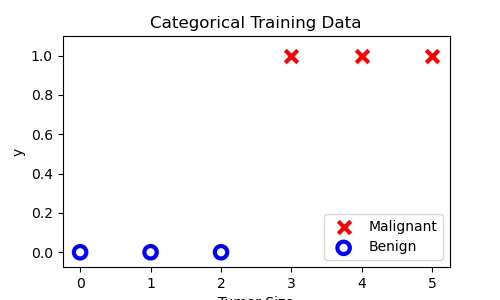

In [102]:
def plt_simple_example(x, y):
    fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    pos = y==1
    neg = y==0
    ax.scatter(x[y==1], y[y==1], label="Malignant", c="r", marker="x", lw=3, s=80)
    ax.scatter(x[y==0], y[y==0], label="Benign", marker="o", facecolors="none", edgecolors="blue", lw=3, s=80)
    ax.set_xlabel("x"); ax.set_ylabel("y"); ax.legend(loc="lower right")
    ax.set_ylim(-0.075, 1.1)
    ax.set_ylabel("y")
    ax.set_xlabel("Tumor Size")
    ax.legend(loc="lower right")
    ax.set_title("Categorical Training Data")
    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.footer_visible = False
    ax.figure.canvas.header_visible = False

x_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.longdouble)
y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.longdouble)
plt.close("all")
plt_simple_example(x_train, y_train)
plt.show()

In [130]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[7, 8, 9], [10, 11, 12]])
print(x.shape)
print(x.ravel().shape)
print(x.ravel())
print(y.ravel())
print(np.c_[x.ravel(), y.ravel()])

(2, 3)
(6,)
[1 2 3 4 5 6]
[ 7  8  9 10 11 12]
[[ 1  7]
 [ 2  8]
 [ 3  9]
 [ 4 10]
 [ 5 11]
 [ 6 12]]


In [129]:
a = np.linspace(1, 3, 3)
b = np.linspace(4, 6, 3)
c, d = np.meshgrid(a, b) #check the example shift +tab
print(a)
print(b)
print(c.shape)
print(d.shape)
print(c)
print(d)

[1. 2. 3.]
[4. 5. 6.]
(3, 3)
(3, 3)
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]
[[4. 4. 4.]
 [5. 5. 5.]
 [6. 6. 6.]]


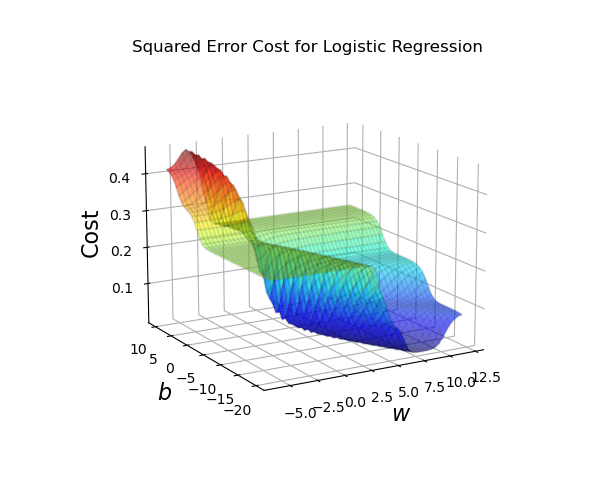

In [167]:
#Now, let's get a demonstration surface plot of the cost using a squared error cost:
#cost MSE J(w, b) = 1/2m Σ (f(x) - y)^2, where f(x) = sigmoid(w. x + b) where z = w.x + b
from matplotlib import cm

def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def compute_cost_logistic_sq_err(X, y, w, b):
    """
    compute sq error cost on logicist data (for negative example only, not used in practice)
    Args:
      X (ndarray): Shape (m,n) matrix of examples with multiple features
      w (ndarray): Shape (n)   parameters for prediction
      b (scalar):              parameter  for prediction
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)                 #add sigmoid to normal sq error cost for linear regression
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return np.squeeze(cost) #remove all the dimensions of size 1
    
def plt_logistic_squared_error(x, y):
    """ plots logistic squared error for demonstration """
    #creating 2000 w's and b's on the fly instead of using gradient descent
    w = np.linspace(-6, 12, 50) #w.shape #(50,)
    b = np.linspace(10, -20, 40) #b.shape #(40,)
    wx, by = np.meshgrid(np.linspace(-6, 12, 50), np.linspace(10, -20, 40)) #wx.shape -  #(40, 50), by.shape - #(40, 50)
    
    points = np.c_[wx.ravel(), by.ravel()] #points.shape -  #(2000, 2)
    #ravel flattens the array to 1d
    #np.c_ = column concatenates 2 1d arrays to 2d array pf 2 columns
    cost = np.zeros(points.shape[0])
    for i in range(points.shape[0]):
        w, b = points[i]
    #w, b - scalars as we are accessing via index
    #note that x has only one feature, after reshaping x shape is (6, 1)
        cost[i] = compute_cost_logistic_sq_err(x.reshape(-1, 1), y, w, b)
    cost = cost.reshape(wx.shape) #cost.shape) #(40, 50)
    
    fig = plt.figure(figsize=(6, 5))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    

    ax = fig.add_subplot(1, 1, 1, projection="3d")
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_rotate_label(False)
    ax.view_init(15, -120)
    ax.plot_surface(wx, by, cost, cmap=cm.jet, alpha=0.6)
    ax.plot_wireframe(wx, by, cost, color="k", alpha=0.1)
    ax.set_xlabel("$w$", fontsize=16)
    ax.set_ylabel("$b$", fontsize=16)
    ax.set_zlabel("Cost", rotation=90, fontsize=16)
    ax.set_title("Squared Error Cost for Logistic Regression")

plt.close('all')
x_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.longdouble)
y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.longdouble)
plt_logistic_squared_error(x_train, y_train)
plt.show()

#While this produces a pretty interesting plot, the surface above not nearly as smooth as the 'soup bowl' from linear regression!
#Logistic regression requires a cost function more suitable to its non-linear nature. 
#This starts with a Loss function called Logistic Loss

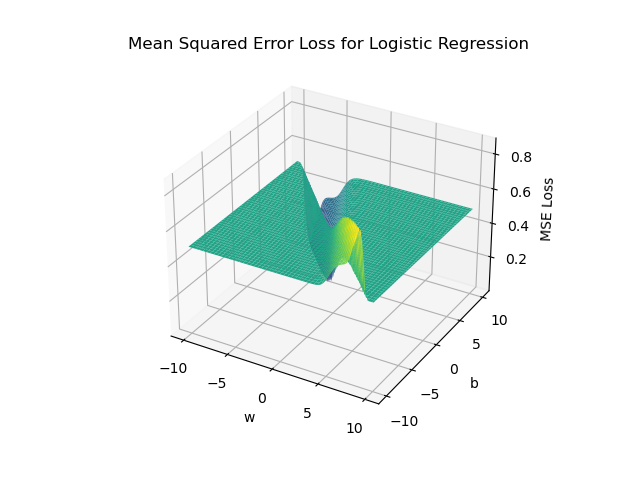

In [168]:
#Logistic regression with mse as cost generated by chatgpt with small example data
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dummy data for w and b
w = np.linspace(-10, 10, 100)
b = np.linspace(-10, 10, 100)

# Dummy data for x and y
x = np.array([[1, 2],
              [3, 4],
              [5, 6],
              [7, 8],
              [9, 10],
              [11, 12]])
y = np.array([0, 0, 0, 1, 1, 1])

# Compute the mean squared error loss for each combination of w and b
z = np.zeros((len(w), len(b)))
for i in range(len(w)):
    for j in range(len(b)):
        # Compute the predicted probabilities
        logits = np.dot(x, [w[i], b[j]])
        probs = 1 / (1 + np.exp(-logits))

        # Compute the mean squared error loss
        mse = np.mean((probs - y) ** 2)

        # Assign the loss value to the corresponding element in z
        z[i, j] = mse

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
W, B = np.meshgrid(w, b)
ax.plot_surface(W, B, z, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('MSE Loss')
ax.set_title('Mean Squared Error Loss for Logistic Regression')

# Show the plot
plt.show()


### Logistic Loss for Logistic Regression
    Logistic Regression uses a loss function more suited to the task of categorization where the target is 0 or 1 rather than any number.

    Note: Loss is a measure of the difference of a single example to its target value while the Cost is a measure of the losses over the training set


    Logistic loss is the cost for a single data point, which is 
    
        Loss(f(x), y) =     { -log(f(x)) for y=1
                            { -(1-log(f(x)) for y=0
                      
          f(x) is the model's prediction, while y is the target value.
          f(x) = g(w. x + b) where function g is the sigmoid function
       
    
    This is without regularization.

    The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target is zero or (y=0) and another for when the target is one (y=1). Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target. See the curves in the below cell.

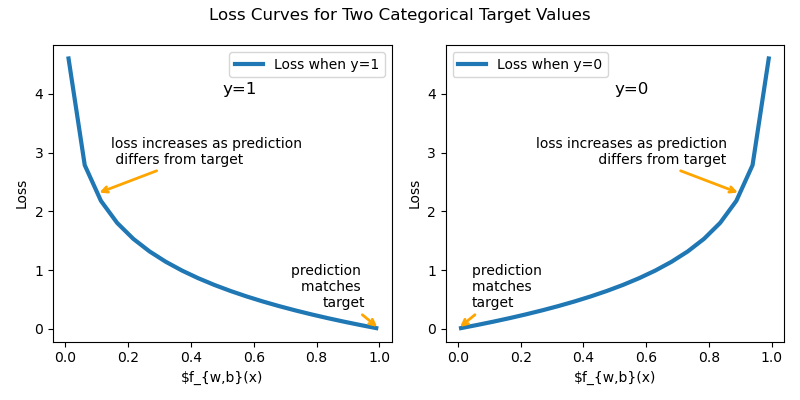

In [200]:
#Logistic Loss for Logistic Regression demonstration
def plt_two_logistic_loss_curves():
    """
    Plot between the prediction f(x) and loss for both positive and negative examples
    """
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    
    f_wb = np.linspace(0.01, 1-0.01, 20)
    ax[0].plot(f_wb, -(np.log(f_wb)), label="Loss when y=1", lw=3)
    ax[0].set_xlabel("$f_{w,b}(x)"); ax[0].set_ylabel("Loss")
    ax[0].legend(loc="best")
    ax[0].annotate("prediction \nmatches \ntarget", xy=(1.0, 0.0), xycoords="data",
                   xytext=[-10, 30], textcoords="offset points", ha="right", va="center",
                  arrowprops={"arrowstyle": "->", "color": "orange", "lw": 2})
    ax[0].annotate("loss increases as prediction\n differs from target", xy=(0.1, -np.log(0.1)),
                   xycoords="data", xytext=[10, 30], textcoords="offset points", ha="left", va="center",
                  arrowprops={"arrowstyle": "->", "color": "orange", "lw": 2})
    ax[0].text(0.5, 4.0, "y=1", fontsize=12)
    
    ax[1].plot(f_wb, -(np.log(1 - f_wb)), label="Loss when y=0", lw=3)
    ax[1].set_xlabel("$f_{w,b}(x)"); ax[1].set_ylabel("Loss")
    ax[1].legend(loc="best")
    ax[1].annotate("prediction \nmatches \ntarget", xy= [0, 0], xycoords="data",
                 xytext=[10, 30], textcoords="offset points", ha="left", va="center",
                   arrowprops={"arrowstyle": "->", "color": "orange", "lw": 2},)
    ax[1].annotate("loss increases as prediction\n differs from target", xy= [0.9, -np.log(1 - 0.9)], xycoords="data",
                 xytext=[-10, 30], textcoords="offset points", ha="right", va="center",
                  arrowprops={"arrowstyle": "->", "color": "orange", "lw": 2},)
    ax[1].text(0.5, 4.0, "y=0", fontsize=12)
    
    
    plt.suptitle("Loss Curves for Two Categorical Target Values", fontsize=12)
    plt.tight_layout()
    plt.show()
    
    
    
plt.close('all')
plt_two_logistic_loss_curves()

     Combined, the curves are similar to the quadratic curve of the squared error loss. Note, the x-axis is f(x) which is the output of a sigmoid. The sigmoid output is strictly between 0 and 1.

    The loss function above can be rewritten to be easier to implement.

               Loss(f(x), y) =  -y log(f(x)) - (1-y) (1-log(f(x))


    This is a rather formidable-looking equation. It is less daunting when you consider y can have only two values, 0 and 1. One can then consider the equation in two pieces: when y=0, the left-hand term is eliminated: 

               Loss(f(x), y) =  -0 log(f(x)) - (1-0) (1-log(f(x)) = - (1-logf(x))

    and when y=1, the right-hand term is eliminated:
               Loss(f(x), y) =  -1 log(f(x)) - (1-1) (1-log(f(x)) = - (logf(x))

    OK, with this new logistic loss function, a cost function can be produced that incorporates the loss from all the examples. . For now, let's take a look at the cost vs parameters curve for the simple example we considered above:
    
    This curve is well suited to gradient descent! It does not have plateaus, local minima, or discontinuities. Note, it is not a bowl as in the case of squared error. Both the cost and the log of the cost are plotted to illuminate the fact that the curve, when the cost is small, has a slope and continues to decline. Reminder: you can rotate the above plots using your mouse.

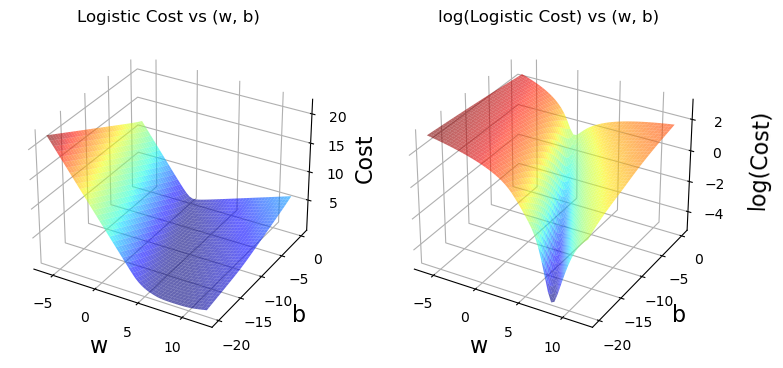

In [4]:
#Combined actual Logistic Loss and plot cost vs params w, b
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt

# def log_1pexp(z, maximum=20):
#     ''' approximate log(1 + exp^z)
#         https://stats.stackexchange.com/questions/475589/numerical-computation-of-cross-entropy-in-practice
#     Args:
#     z   : (ndarray Shape (n, 1) or (n,)  input
#     out : (ndarray Shape matches z      output ~= np.log(1 + exp(z))
#     '''

#     out  = np.zeros_like(z, dtype=float)
#     idx    = z <= maximum
#     not_idx   = np.logical_not(idx)

#     out[idx]  = np.log(1 + np.exp(z[idx]))
#     out[not_idx] = z[not_idx]
#     return out

def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def compute_logistic_cost(x, y, w, b, safe=True):
    m, n = x.shape
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)             # ensure 2D
    w = w.reshape(-1, 1)
    cost = 0.0
    z = x @ w + b
    f = sigmoid(z)
    if safe:
        cost = -(y * z) + np.log(1 + np.exp(z))
#         cost = -(y * z) + log_1pexp(z)
        cost = np.sum(cost) / m  
    else:
        cost = 1/m * (np.dot(-y.T, np.log(f)) - np.dot((1-y).T, (1-np.log(f)))) #sometimes f = 0 then log 0 = infinity
    return cost

def plt_logistic_cost(x, y):
    wx, by = np.meshgrid(np.linspace(-6, 12, 50), np.linspace(0, -20, 40))
    points = np.c_[wx.ravel(), by.ravel()]
    cost = np.zeros(points.shape[0], dtype=np.longdouble)
    for i in range(points.shape[0]):
        w_i, b_i = points[i]
        cost[i] = compute_logistic_cost(x.reshape(-1, 1), y, w_i, b_i)
    cost = cost.reshape(wx.shape)
    
    #plotting
    fig = plt.figure(figsize=(9, 5))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    ax = fig.add_subplot(1, 2, 1, projection="3d")
    ax.plot_surface(wx, by, cost, alpha=0.6, cmap=cm.jet,)
    ax.set_xlabel("w", fontsize=16)
    ax.set_ylabel("b", fontsize=16)
    ax.set_zlabel("Cost", rotation=90, fontsize=16)
    ax.set_title("Logistic Cost vs (w, b)")
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    
    ax = fig.add_subplot(1, 2, 2, projection="3d")
    ax.plot_surface(wx, by, np.log(cost), alpha=0.6, cmap=cm.jet,)
    ax.set_xlabel("w", fontsize=16)
    ax.set_ylabel("b", fontsize=16)
    ax.set_zlabel("\nlog(Cost)", fontsize=16)
    ax.set_title("log(Logistic Cost) vs (w, b)")
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    plt.show()

plt.close('all')
x_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.longdouble)
y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.longdouble)
plt_logistic_cost(x_train, y_train)